# Первичный анализ данных
В этом ноутбуке производится первичный анализ данных проекта и создаются промежуточные фреймы для последующих манипуляций.

**Содержание**
1. [Загружаем библиотеки](#libs)
2. [Загружаем данные](#load_data)
3. [Анализ структуры базового датафрейма](#base_dataframe)
4. [Работа с пропусками](#gaps)
5. [Шаблоны протоколов](#templates)
6. [Школы](#schools)
7. [Кураторы, учителя, наблюдатели](#people)


___
<a id='libs' name='libs'></a>
## 1. Загружаем библиотеки для работы с данными


In [1]:
%run "./lib/load_big_libs.py"

In [2]:
%run "./lib/data_lib.py"

___
<a id='load_data' name='load_data'></a>
## 2. Загружаем базовые датафреймы
*Функция get_core_dataframes загружена из файла /lib/data_lib.py*

In [3]:
df_templates, df_protocols = get_core_dataframes()

# Сразу же проверяем данные о шаблонах
df_templates.head(20)

,code,id,title,group,level,protocols_df_name
0,П1.1,1,Базовый протокол «Распределение внимания учителя»,Распределение внимания учителя,1,protocols_1_1
1,П1.2,3,Усложненный протокол «Распределение внимания у...,Распределение внимания учителя,2,protocols_1_2
2,П1.3,2,Прицельный протокол «Распределение внимания уч...,Распределение внимания учителя,3,protocols_1_3
3,П2.1,4,Базовый протокол «Время на размышление»,Время на размышление,1,protocols_2_1
4,П2.2,6,Усложненный протокол «Время на размышление»,Время на размышление,2,protocols_2_2
5,П2.3,5,Прицельный протокол «Время на размышление»,Время на размышление,3,protocols_2_3
6,П3.1,7,Базовый протокол «Тип вопросов»,Тип вопросов,1,protocols_3_1
7,П3.2,9,Усложненный протокол «Тип вопросов»,Тип вопросов,2,protocols_3_2
8,П3.3,8,Прицельный протокол «Тип вопросов»,Тип вопросов,3,protocols_3_3
9,П4.1,10,Базовый протокол «Качество обратной связи»,Качество обратной связи,1,protocols_4_1


___
<a id='base_dataframe' name='base_dataframe'></a>
## 3. Анализ структуры файла с данными о протоколах

Смотрим структуру файла

In [4]:
df_protocols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   prot_id              3001 non-null   int64  
 1   template_code        3001 non-null   object 
 2   date_of_lesson       3001 non-null   object 
 3   org_id               3001 non-null   int64  
 4   teacher_id           3001 non-null   int64  
 5   observer_id          3001 non-null   int64  
 6   curator_id           3001 non-null   int64  
 7   class                872 non-null    float64
 8   satisfaction         1016 non-null   float64
 9   wish_to_change       952 non-null    float64
 10  pupils_all           3001 non-null   int64  
 11  pupils_strong        2059 non-null   float64
 12  pupils_middle        2059 non-null   float64
 13  pupils_weak          2059 non-null   float64
 14  interactions_all     1752 non-null   float64
 15  interactions_strong  1818 non-null   f

In [5]:
# Сохраняю эту строчку. Она позволила найти выброс по значению одного из полей.
# Вычислив id протокола, в котором было зафиксировано неправильное значение, 
# я перешел в админку проекта, исправил значение, а потом заново выгрузил все данные по протоколам.
# df_protocols[df_protocols['pupils_all'] == df_protocols['pupils_all'].max()].head()

In [6]:
df_protocols.describe()

,prot_id,org_id,teacher_id,observer_id,curator_id,class,satisfaction,wish_to_change,pupils_all,pupils_strong,pupils_middle,pupils_weak,interactions_all,interactions_strong,interactions_middle,interactions_weak,attention_all,attention_strong,attention_middle,attention_weak
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,872.000000,1016.000000,952.000000,3001.000000,2059.000000,2059.000000,2059.000000,1752.000000,1818.000000,1818.000000,1818.000000,1946.000000,2059.000000,2059.000000,2059.000000
mean,1579.222926,102.580806,713.616794,713.660447,706.233256,5.472477,3.485236,2.161765,8.818394,3.139388,4.382224,3.112190,16.060502,4.471397,5.700770,3.556106,6.644913,2.739194,3.523069,2.335600
std,890.060019,23.647302,137.508598,137.603640,134.675950,2.524129,0.633839,0.972324,7.595482,2.791159,3.554667,2.530387,20.093664,7.169733,9.073273,6.463937,6.937534,2.800193,3.057726,2.270046
min,41.000000,1.000000,472.000000,472.000000,471.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,805.000000,88.000000,597.000000,597.000000,595.000000,3.000000,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,1575.000000,108.000000,719.000000,719.000000,709.000000,6.000000,4.000000,2.000000,8.000000,2.000000,3.000000,3.000000,11.000000,0.000000,0.000000,0.000000,6.000000,2.000000,3.000000,2.000000
75%,2356.000000,121.000000,827.000000,827.000000,819.000000,7.000000,4.000000,3.000000,13.000000,4.000000,6.000000,4.000000,25.000000,7.000000,9.000000,5.000000,10.000000,4.000000,5.000000,3.000000
max,3115.000000,133.000000,970.000000,970.000000,952.000000,11.000000,4.000000,4.000000,34.000000,21.000000,18.000000,28.000000,150.000000,56.000000,74.000000,76.000000,102.000000,28.000000,31.000000,31.000000


#### Структура данных основного датафрейма с информацией о заполненных протоколах

Приведенный ниже список полей разбит на условные группы, поля внутри которых связаны по типу или содержательно.

В этом датафрейме сохранены только те поля из протоколов, которые встречаются в большей их части. Многие поля в исходных протоколах встречались только в отдельных группах протоколов. Они полезны для анализа, но этот анализ имеет ограниченный объем влияния на всю совокупность данных (может быть - и нет; это - рабочая гипотеза)

1. **prot_id** - уникальный идентификатор протокола.   
2. **template_code** - символьный идентификатор одного из 19 шаблонов протоколов (П1.1, П1.2, П1.3, П2.1, ... П7.1)
3. **date_of_lesson** - дата проведения урока в формате дд.мм.ГГГГ
4. **org_id** - уникальный целочисленный идентификатор организации
5. **teacher_id** - уникальный целочисленный идентификатор учителя
6. **observer_id** - уникальный целочисленный идентификатор наблюдателя
7. **curator_id** - уникальный целочисленный идентификатор куратора


8. **class** - номер параллели класса, в котором проведен урок (поле заполнялось только для более поздних протоколов)
9. **satisfaction** - степень удовлетворенности учителя от проведенного урока (поле заполнялось только для более поздних протоколов)   
    1 - не удовлетворен,  
    2 - скорее не удовлетворен  
    3 - скорее удовлетворен  
    4 - удовлетворен  
    NaN - поле не заполнялось  
10. **wish_to_change** - желание что-то изменить в своих действиях на следующем уроке (поле заполнялось только для более поздних протоколов)
    1 - нет желания  что-то изменить    
    2 - скорее нет желания что-то изменить   
    3 - скорее есть желание  что-то изменить  
    4 - есть желание что-то изменить
    NaN - поле не заполнялось  

11. **pupils_all** - количество учеников на уроке. Поле может быть пустым, но его значение можно посчитать, если есть данные в следующих трех полях
12. **pupils_strong** - количество **сильных** учеников на уроке
13. **pupils_middle** - количество **средних** учеников на уроке
14. **pupils_weak** - количество **слабых** учеников на уроке


15. **interactions_all** - количество взаимодействий учителя со всеми учениками в классе (как правило - это количество ответов учеников, но в некоторых протоколах в качестве взаимодействий учитывались и другие взаимодействия, поэтому для отдельных протоколов эта цифра у одного и того же учителя может сильно отличаться от моды).
16. **interactions_strong** - количество взаимодействий учителя с **сильными** учениками
17. **interactions_middle** - количество взаимодействий учителя со **средними** учениками
18. **interactions_weak** - количество взаимодействий учителя со **слабыми** учениками


19. **attention_all** - количество учеников, с которыми учитель взаимодействовал во время урока  
20. **attention_strong** - количество **сильных** учеников, с которыми учитель взаимодействовал во время урока  
21. **attention_middle** - количество **средних** учеников, с которыми учитель взаимодействовал во время урока  
22. **attention_weak** - количество **слабых** учеников, с которыми учитель взаимодействовал во время урока  


23. **teacher_comments** - текстовый комментарий учителя, в котором может содержаться в косвенной форме оценка успешности - неуспешности урока, а также намерений что-либо изменить при проведении следующих уроков. Но может и не содержаться. Некоторые учителя это поле не заполняли.


In [7]:
df_protocols.head()

,prot_id,template_code,date_of_lesson,org_id,teacher_id,observer_id,curator_id,class,satisfaction,wish_to_change,...,pupils_weak,interactions_all,interactions_strong,interactions_middle,interactions_weak,attention_all,attention_strong,attention_middle,attention_weak,teacher_comments
0,816,П1.1,01.02.2022,133,726,725,724,NaN,NaN,NaN,...,NaN,30.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,Больше внимания уделять слабым ученикам и моти...
1,1162,П1.1,02.02.2022,128,736,735,734,NaN,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,Учитель уделяет внимание всем учащимся
2,1170,П1.1,02.02.2022,128,735,736,734,NaN,NaN,NaN,...,NaN,17.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,"Уделять внимание не только тем, кто поднимает ..."
3,1069,П1.1,04.02.2022,133,725,726,724,NaN,NaN,NaN,...,NaN,39.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,Больше внимания уделять слабым ученикам и моти...
4,295,П1.1,07.02.2022,79,534,533,532,NaN,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,Своё внимание учитель распределял на всех обу...


___
<a id='gaps' name='gaps'></a>
## 4. Разберемся с пропусками

Для части колонок пропуски - это нормально, мы можем игнорировать эти данные.

Но есть колонки, где часть пропусков может быть корректно заменена на валидное значение.

**prot_id	template_code	date_of_lesson	org_id	teacher_id	observer_id	curator_id**  
Первые семь колонок заполнены полностью, без пропусков, и судя по статистическим характеристикам этих колонок данные в них должны быть корректными.

**class satisfaction wish_to_change**
Следующие три колонки появились в шаблонах протоколов осенью, поэтому они не заполнялись в первой группе протоколов, а также в некоторых осенних протоколах, если в школах продолжали использовать старые версии шаблонов.  
Значения в этих колонках правильно оставить незаполненными. Однако одной из задач настоящей работы может быть предсказание значений колонок **satisfaction** и **wish_to_change**, используя анализ текстового поля протокола - **teacher_comments**

**pupils_all pupils_strong pupils_middle pupils_weak**  
По статистике видно, что информация о количестве учеников, присутствовавших на уроке, заполнена для всех протоколов, однако минимальное значение этого поля - 0. Это означает, что есть протоколы, в которых это число просто не зафиксировано. В ячейке ниже я посчитал количество таких протоколов. Их много - 580. 
Используемый ниже код позволил определить, что для протоколов, в которых это поле содержит 0, в колонках о количестве сильных, средних и слабых учеников при этом могут встречаться значения.
Значит для этого поля нужно установить значение NaN в случае, если информации в полях о сильных, средних и слабых учениках нет, и сумму их значений в противном случае.

Аналогичный алгоритм применим и для двух следующих групп полей:  
**interactions_all interactions_strong interactions_middle interactions_weak**  
**attention_all attention_strong attention_middle attention_weak**

Последнее поле датасета - **teacher_comments**. Оно может содержать пропуски в случае, если учитель при заполнении протокола по каким-то причинам это поле проигнорировал.

In [8]:
#В этой ячейке проводим вычисления для выводов, сформулированных в ячейке выше.
#len(df_protocols[df_protocols['pupils_all'] == df_protocols['pupils_all'].min()])
df_tmp = df_protocols[df_protocols['pupils_all'] == df_protocols['pupils_all'].min()].copy()
df_tmp[['pupils_all', 'pupils_strong', 'pupils_middle', 'pupils_weak']].describe()

,pupils_all,pupils_strong,pupils_middle,pupils_weak
count,580.0,580.000000,580.000000,580.000000
mean,0.0,3.289655,4.272414,2.967241
std,0.0,3.120310,3.605541,2.505392
min,0.0,0.000000,0.000000,0.000000
25%,0.0,1.000000,2.000000,1.000000
50%,0.0,2.000000,3.000000,3.000000
75%,0.0,5.000000,5.000000,4.000000
max,0.0,21.000000,18.000000,16.000000


In [9]:
for col in df_protocols.columns:
    print(col, end=' ')

prot_id template_code date_of_lesson org_id teacher_id observer_id curator_id class satisfaction wish_to_change pupils_all pupils_strong pupils_middle pupils_weak interactions_all interactions_strong interactions_middle interactions_weak attention_all attention_strong attention_middle attention_weak teacher_comments 

In [10]:
# Определяем универсальную функцию для переопределения значения суммы параметров, 
# если они заданы, в противном случае сохраняем текущее значение
def sum_from_others(cur_val, vals):
    ret = sum(vals)
    return ret if ret>0 else cur_val

In [11]:
# Создадим копию рабочего датафрейма и далее будем работать с ней
df = df_protocols.copy()

In [12]:
# Обрабатываем вначале первую группу колонок - про количество учеников на уроке

df['pupils_all'] = df.apply(lambda x: sum_from_others(x['pupils_all'], [x['pupils_strong'], x['pupils_middle'], x['pupils_weak']]), axis=1)
df.loc[df['pupils_all'] == 0, 'pupils_all'] = np.nan


In [13]:
# Смотрим, что получилось. Радостно замечаем, что теперь в колонке pupils_all нет нулевых или неопределенных значений
df[['pupils_all', 'pupils_strong', 'pupils_middle', 'pupils_weak']].describe()

,pupils_all,pupils_strong,pupils_middle,pupils_weak
count,3001.000000,2059.000000,2059.000000,2059.000000
mean,10.825392,3.139388,4.382224,3.112190
std,7.017989,2.791159,3.554667,2.530387
min,1.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,2.000000,1.000000
50%,9.000000,2.000000,3.000000,3.000000
75%,15.000000,4.000000,6.000000,4.000000
max,34.000000,21.000000,18.000000,28.000000


In [14]:
# Обрабатываем вторую группу колонок - про количество взаимодействий с учениками на уроке

df['interactions_all'] = df.apply(lambda x: sum_from_others(x['interactions_all'], [x['interactions_strong'], x['interactions_middle'], x['interactions_weak']]), axis=1)
df.loc[df['interactions_all'] == 0, 'interactions_all'] = np.nan

df[['interactions_all', 'interactions_strong', 'interactions_middle', 'interactions_weak']].describe()

,interactions_all,interactions_strong,interactions_middle,interactions_weak
count,1845.000000,1818.000000,1818.000000,1818.000000
mean,27.847696,4.471397,5.700770,3.556106
std,18.926565,7.169733,9.073273,6.463937
min,1.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000
50%,23.000000,0.000000,0.000000,0.000000
75%,36.000000,7.000000,9.000000,5.000000
max,150.000000,56.000000,74.000000,76.000000


In [15]:
# Третья группа колонок - про количество учеников на уроке, с которыми взаимодействовал учитель

df['attention_all'] = df.apply(lambda x: sum_from_others(x['attention_all'], [x['attention_strong'], x['attention_middle'], x['attention_weak']]), axis=1)
df.loc[df['attention_all'] == 0, 'attention_all'] = np.nan

df[['attention_all', 'attention_strong', 'attention_middle', 'attention_weak']].describe()

,attention_all,attention_strong,attention_middle,attention_weak
count,2643.000000,2059.000000,2059.000000,2059.000000
mean,9.494892,2.739194,3.523069,2.335600
std,6.573830,2.800193,3.057726,2.270046
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,2.000000,1.000000
50%,8.000000,2.000000,3.000000,2.000000
75%,12.000000,4.000000,5.000000,3.000000
max,102.000000,28.000000,31.000000,31.000000


In [16]:
# Сохраним датафрейм с заполненными пропусками
df.to_csv('data/intermid/full_df_gaps.csv', sep=';')

___
<a id='templates' name='templates'></a>
## 5. Шаблоны протоколов

Проанализируем метрики по шаблонам протоколов

In [17]:
# Считаем количество протоколов по каждому из шаблонов
templates_stat = pd.DataFrame(df['template_code'].value_counts()) #.columns(['protocols_cnt'])
templates_stat.columns = ['protocols_cnt']
#templates_stat

# Добавляем эту колонку к справочнику шаблонов
tmp = pd.concat([df_templates.set_index('code'), templates_stat], join='outer', axis=1)
tmp

,id,title,group,level,protocols_df_name,protocols_cnt
П1.1,1,Базовый протокол «Распределение внимания учителя»,Распределение внимания учителя,1,protocols_1_1,182
П1.2,3,Усложненный протокол «Распределение внимания у...,Распределение внимания учителя,2,protocols_1_2,278
П1.3,2,Прицельный протокол «Распределение внимания уч...,Распределение внимания учителя,3,protocols_1_3,190
П2.1,4,Базовый протокол «Время на размышление»,Время на размышление,1,protocols_2_1,148
П2.2,6,Усложненный протокол «Время на размышление»,Время на размышление,2,protocols_2_2,216
П2.3,5,Прицельный протокол «Время на размышление»,Время на размышление,3,protocols_2_3,168
П3.1,7,Базовый протокол «Тип вопросов»,Тип вопросов,1,protocols_3_1,173
П3.2,9,Усложненный протокол «Тип вопросов»,Тип вопросов,2,protocols_3_2,243
П3.3,8,Прицельный протокол «Тип вопросов»,Тип вопросов,3,protocols_3_3,183
П4.1,10,Базовый протокол «Качество обратной связи»,Качество обратной связи,1,protocols_4_1,166


In [18]:
# templates_org_stat = df.groupby('template_code').agg({'org_id': ['unique']})
all_orgs_cnt = len(df['org_id'].unique())
all_teachers_cnt = len(df['teacher_id'].unique())

orgs_cnt = [len(df[df['template_code'] == code]['org_id'].unique())  for code in df_templates['code']]
tmp['unique_orgs_cnt'] = pd.Series(orgs_cnt, index=df_templates['code'].tolist())
tmp['unique_orgs_proc'] = tmp['unique_orgs_cnt']/all_orgs_cnt

teachers_cnt = [len(df[df['template_code'] == code]['teacher_id'].unique())  for code in df_templates['code']]
tmp['unique_teachers_cnt'] = pd.Series(teachers_cnt, index=df_templates['code'].tolist())
tmp['unique_teachers_proc'] = tmp['unique_teachers_cnt']/all_teachers_cnt

#Сохраним получившийся датафрейм в отдельном файле
tmp.to_csv('data/intermid/df_templates_extended.csv', sep=';')
tmp                                                


,id,title,group,level,protocols_df_name,protocols_cnt,unique_orgs_cnt,unique_orgs_proc,unique_teachers_cnt,unique_teachers_proc
П1.1,1,Базовый протокол «Распределение внимания учителя»,Распределение внимания учителя,1,protocols_1_1,182,54,0.805970,157,0.556738
П1.2,3,Усложненный протокол «Распределение внимания у...,Распределение внимания учителя,2,protocols_1_2,278,63,0.940299,202,0.716312
П1.3,2,Прицельный протокол «Распределение внимания уч...,Распределение внимания учителя,3,protocols_1_3,190,56,0.835821,155,0.549645
П2.1,4,Базовый протокол «Время на размышление»,Время на размышление,1,protocols_2_1,148,47,0.701493,125,0.443262
П2.2,6,Усложненный протокол «Время на размышление»,Время на размышление,2,protocols_2_2,216,57,0.850746,162,0.574468
П2.3,5,Прицельный протокол «Время на размышление»,Время на размышление,3,protocols_2_3,168,54,0.805970,136,0.482270
П3.1,7,Базовый протокол «Тип вопросов»,Тип вопросов,1,protocols_3_1,173,49,0.731343,148,0.524823
П3.2,9,Усложненный протокол «Тип вопросов»,Тип вопросов,2,protocols_3_2,243,59,0.880597,173,0.613475
П3.3,8,Прицельный протокол «Тип вопросов»,Тип вопросов,3,protocols_3_3,183,54,0.805970,157,0.556738
П4.1,10,Базовый протокол «Качество обратной связи»,Качество обратной связи,1,protocols_4_1,166,48,0.716418,140,0.496454


In [19]:
tmp.describe()

,id,level,protocols_cnt,unique_orgs_cnt,unique_orgs_proc,unique_teachers_cnt,unique_teachers_proc
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,10.000000,1.947368,157.947368,47.578947,0.710134,130.105263,0.461366
std,5.627314,0.848115,55.120548,9.968371,0.148782,36.491848,0.129404
min,1.000000,1.000000,78.000000,31.000000,0.462687,71.000000,0.251773
25%,5.500000,1.000000,111.000000,39.000000,0.582090,96.000000,0.340426
50%,10.000000,2.000000,166.000000,48.000000,0.716418,136.000000,0.482270
75%,14.500000,3.000000,186.500000,55.000000,0.820896,157.000000,0.556738
max,19.000000,3.000000,278.000000,63.000000,0.940299,202.000000,0.716312


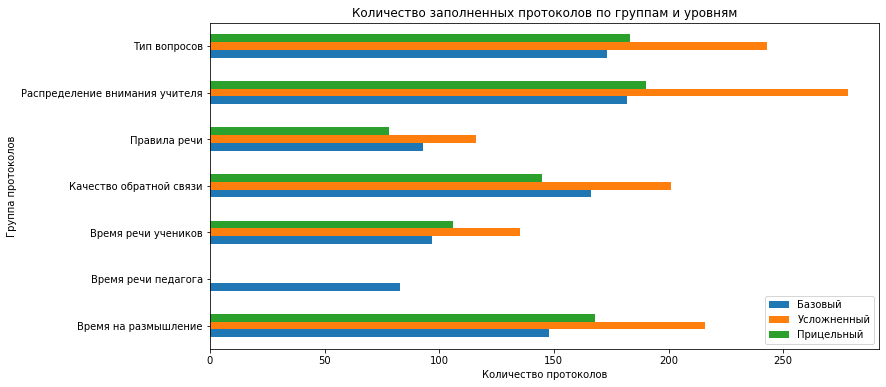

In [33]:
# Посмотрим на статистику использования разных шаблонов протоколов
rcParams['figure.figsize'] = 12,6 
tmp3 = tmp.pivot_table(index='group',columns=['level'],values='protocols_cnt')
tmp3.columns = ['Базовый', 'Усложненный', 'Прицельный']
tmp3.plot(kind='barh')
plt.legend()
plt.ylabel('Группа протоколов')
plt.xlabel('Количество протоколов')
plt.title('Количество заполненных протоколов по группам и уровням')
plt.savefig('images/templates_distr.png')

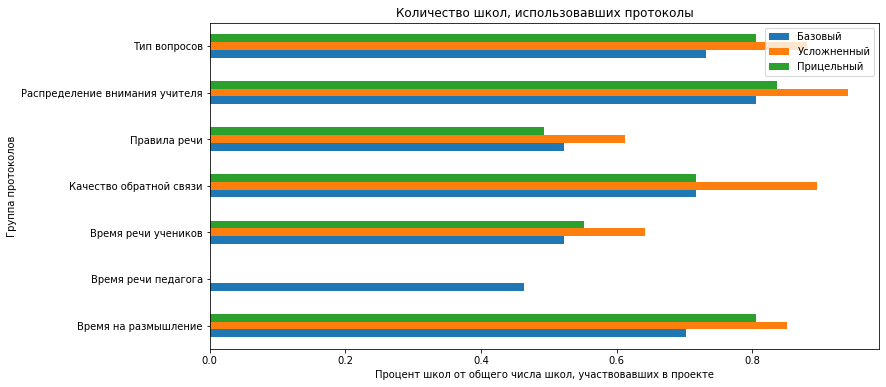

In [36]:
# Сравним эту статистику со статистикой охвата школ, которые использовали эти протоколы
tmp4 = tmp.pivot_table(index='group',columns=['level'],values='unique_orgs_proc')
tmp4.columns = ['Базовый', 'Усложненный', 'Прицельный']
tmp4.plot(kind='barh')
plt.legend()
plt.ylabel('Группа протоколов')
plt.xlabel('Процент школ от общего числа школ, участвовавших в проекте')
plt.title('Количество школ, использовавших протоколы')
plt.savefig('images/templates_distr_2.png')

Text(0.5, 1.0, 'Количество учителей, использовавших протоколы')

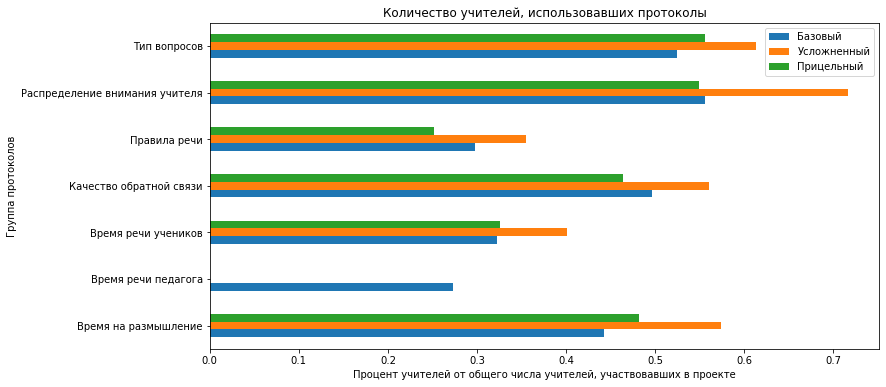

In [29]:
# А теперь то же самое, но по учителям
#plt.style.use('bmh')
tmp5 = tmp.pivot_table(index='group',columns=['level'],values='unique_teachers_proc')
tmp5.columns = ['Базовый', 'Усложненный', 'Прицельный']
tmp5.plot(kind='barh')
plt.legend()
plt.ylabel('Группа протоколов')
plt.xlabel('Процент учителей от общего числа учителей, участвовавших в проекте')
plt.title('Количество учителей, использовавших протоколы')

In [38]:
tmp.groupby('group')['protocols_cnt'].sum().sort_values(ascending=False)

group
Распределение внимания учителя    650
Тип вопросов                      599
Время на размышление              532
Качество обратной связи           512
Время речи учеников               338
Правила речи                      287
Время речи педагога                83
Name: protocols_cnt, dtype: int64

<AxesSubplot:title={'center':'Популярность разных групп протоколов среди организаций'}, xlabel='Группа протоколов', ylabel='Доля организаций, использующих протоколы'>

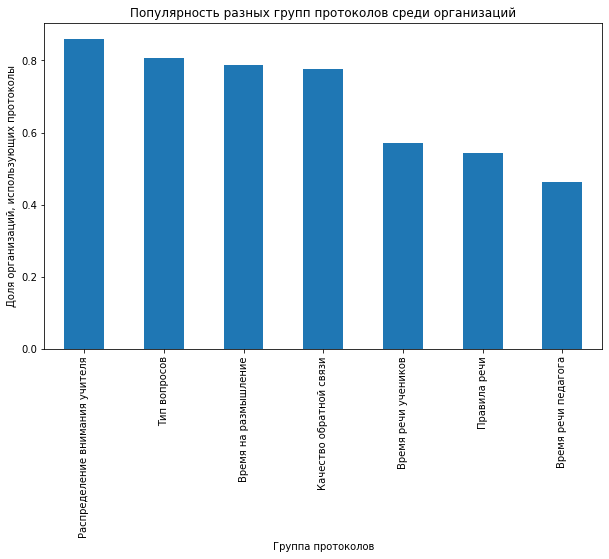

In [39]:
rcParams['figure.figsize'] = 10,6  
tmp.groupby('group')['unique_orgs_proc'].mean().sort_values(ascending=False).plot(
    kind='bar', 
    xlabel='Группа протоколов',
    ylabel='Доля организаций, использующих протоколы',
    title='Популярность разных групп протоколов среди организаций')

<AxesSubplot:title={'center':'Частота использования разных уровней протоколов среди учителей'}, xlabel='Уровень протоколов', ylabel='Доля учителей, использовавших протоколы'>

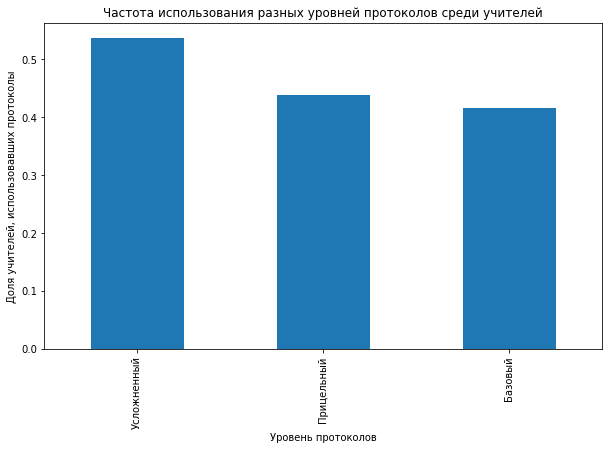

In [40]:
tmp6 = tmp.groupby('level')['unique_teachers_proc'].mean().sort_values(ascending=False)
levels = ['Базовый', 'Усложненный', 'Прицельный']
tmp6.index = [levels[i-1] for i in tmp6.index]
tmp6.plot(
    kind='bar', 
    xlabel='Уровень протоколов',
    ylabel='Доля учителей, использовавших протоколы',
    title='Частота использования разных уровней протоколов среди учителей',
    )


<AxesSubplot:title={'center':'Частота использования разных уровней протоколов по количеству протоколов'}, xlabel='Уровень протоколов'>

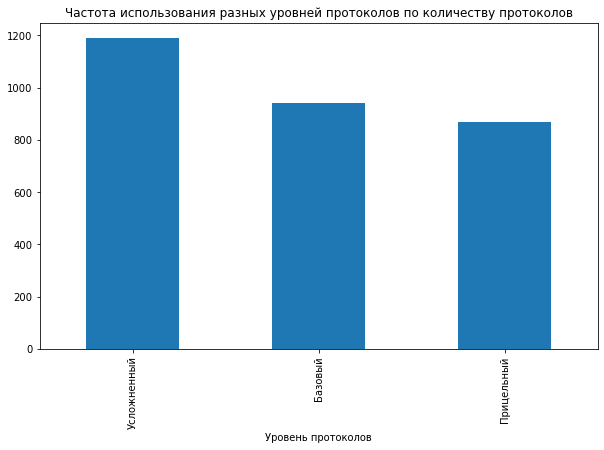

In [41]:
tmp6 = tmp.groupby('level')['protocols_cnt'].sum().sort_values(ascending=False)
levels = ['Базовый', 'Усложненный', 'Прицельный']
tmp6.index = [levels[i-1] for i in tmp6.index]
tmp6.plot(
    kind='bar', 
    xlabel='Уровень протоколов',
    title='Частота использования разных уровней протоколов по количеству протоколов',
    )


### Резюме по анализу шаблонов протоколов
1. Все шаблоны протоколов использовались, но с разной частотой (разница - более чем в три раза):
- Чаще всего использовался Усложненный протокол «Распределение внимания учителя»
- Реже всего использовался Прицельный протокол «Время речи»
2. Не было ни одного шаблона, который использовали бы в каждой школе
3. Не было ни одного шаблона, который использовал бы каждый учитель
4. Самая популярная группа протоколов - Распределение внимания учителя
5. Чаще всего использовались усложненные протоколы. Базовые и прицельные использовались примерно с одинаковой частотой.
6. Хотя усложненные протоколы были лидерами во всех срезах, обнаружилось, что несмотря на то, что после усложненных в рамках проекта больше было базовых протоколов, но на уровне среза по доле учителей, использующих протоколы разного уровня, на втором месте оказался прицельный протокол.
7. Неожиданное наблюдение - высокая доля учителей, которые НЕ попробовали протоколы отдельных уровней

___
<a id='schools' name='schools'></a>
## 6. Анализ данных по школам

В этой части ноутбука посмотрим на данные основного датафрейма с точки зрения того, что мы можем понять об организациях, которые принимали участие в этом исследовании.

Создадим датафрейм со списком id организаций и получим несколько колонок, которые будут содержать некоторые признаки, так или иначе характеризующие каждую организацию. Потом посмотрим на распределения этих данных.

Поехали!

In [42]:
df_orgs = df.groupby('org_id').agg({'prot_id': 'count', 'pupils_all': 'mean'})
df_orgs.insert(0, 'org_id', df_orgs.index)
df_orgs.columns = ['org_id', 'protocols', 'pupils_mean']
df_orgs['pupils_mean'] = df_orgs['pupils_mean'].round(0)

def get_unique_count(o_id, df_field):
    return len(df[df['org_id'] == o_id][df_field].unique())

df_orgs['curators'] = df_orgs.apply(lambda x: get_unique_count(x['org_id'], 'curator_id'), axis=1)
df_orgs['teachers'] = df_orgs.apply(lambda x: get_unique_count(x['org_id'], 'teacher_id'), axis=1)
df_orgs['prot_templates'] = df_orgs.apply(lambda x: get_unique_count(x['org_id'], 'template_code'), axis=1)
#df_orgs['prot_per_teacher'] = df_orgs['protcoc']

# Вычислим доп.параметр - количество протоколов на одного учителя в школе
df_orgs['protocols_per_teacher'] = (df_orgs['protocols']/df_orgs['teachers']).round(1)

df_orgs

,org_id,protocols,pupils_mean,curators,teachers,prot_templates,protocols_per_teacher
org_id,,,,,,,
1,1,59,9.0,3,9,15,6.6
68,68,62,21.0,4,9,14,6.9
69,69,32,5.0,1,2,15,16.0
70,70,35,2.0,1,2,13,17.5
71,71,34,10.0,1,3,15,11.3
...,...,...,...,...,...,...,...
129,129,96,10.0,3,6,17,16.0
130,130,33,4.0,2,5,11,6.6
131,131,40,7.0,2,5,11,8.0


In [43]:
df_orgs.describe()

,org_id,protocols,pupils_mean,curators,teachers,prot_templates,protocols_per_teacher
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,99.014925,44.791045,9.686567,1.910448,4.208955,13.492537,11.783582
std,22.598265,23.125178,6.073312,1.124538,2.465135,3.202145,4.320760
min,1.000000,16.000000,2.000000,1.000000,2.000000,6.000000,4.500000
25%,83.500000,27.500000,5.000000,1.000000,2.000000,11.000000,8.450000
50%,100.000000,38.000000,8.000000,2.000000,4.000000,14.000000,11.300000
75%,116.500000,57.000000,11.500000,2.000000,5.000000,16.000000,15.250000
max,133.000000,128.000000,30.000000,6.000000,11.000000,19.000000,22.000000


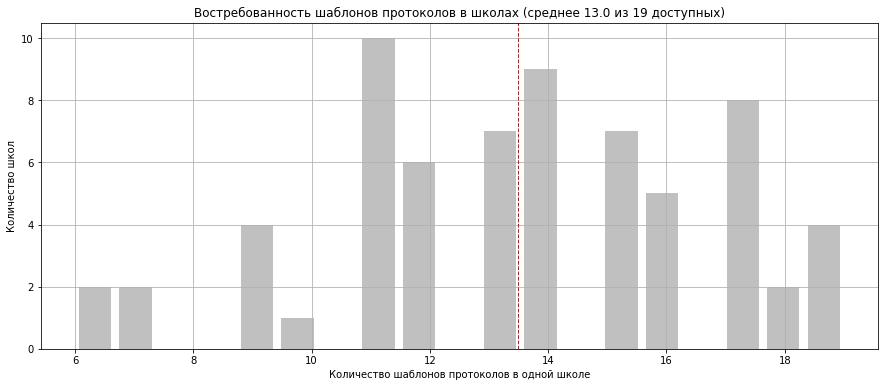

In [44]:
rcParams['figure.figsize'] = 15,6  
df_orgs['prot_templates'].hist(bins=19, rwidth=0.8, color='silver')
plt.title(f'Востребованность шаблонов протоколов в школах (среднее {round(df_orgs["prot_templates"].mean(), 0)} из 19 доступных)')
plt.ylabel('Количество школ')
plt.xlabel('Количество шаблонов протоколов в одной школе')
plt.axvline(df_orgs['prot_templates'].mean(), color='r', linestyle='dashed', linewidth=1)

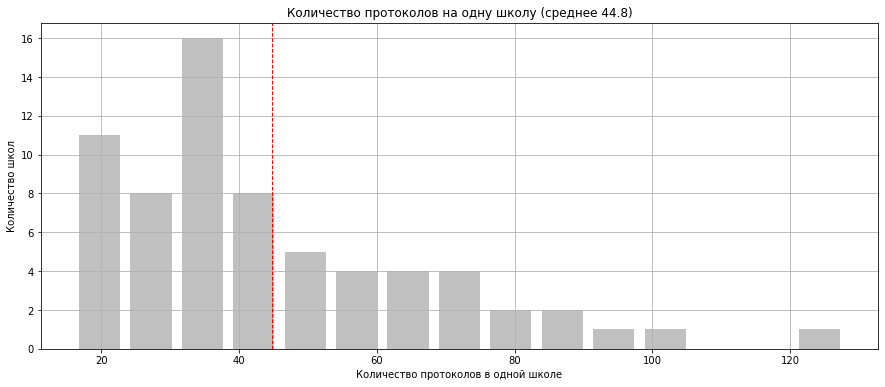

In [45]:
rcParams['figure.figsize'] = 15,6  
df_orgs['protocols'].hist(bins=15, rwidth=0.8, color='silver')
plt.title(f'Количество протоколов на одну школу (среднее {round(df_orgs["protocols"].mean(), 1)})')
plt.ylabel('Количество школ')
plt.xlabel('Количество протоколов в одной школе')
plt.axvline(df_orgs['protocols'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.savefig('images/orgs_distr_1.png')

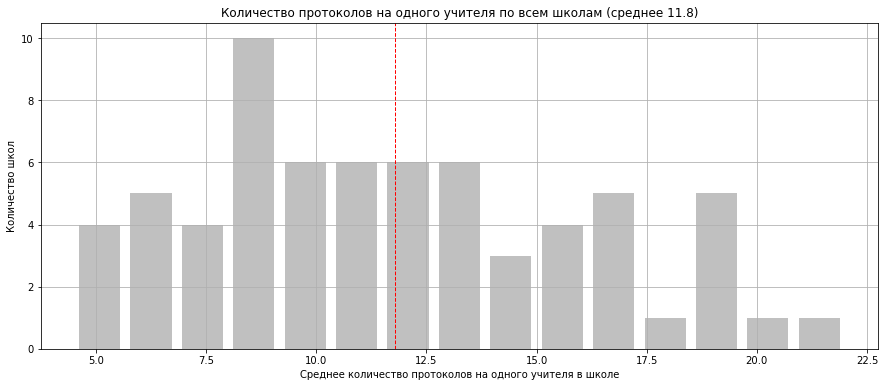

In [46]:
rcParams['figure.figsize'] = 15,6  
df_orgs['protocols_per_teacher'].hist(bins=15, rwidth=0.8, color='silver')
plt.title(f'Количество протоколов на одного учителя по всем школам (среднее {round(df_orgs["protocols_per_teacher"].mean(), 1)})')
plt.ylabel('Количество школ')
plt.xlabel('Среднее количество протоколов на одного учителя в школе')
plt.axvline(df_orgs['protocols_per_teacher'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.savefig('images/orgs_distr_2.png')

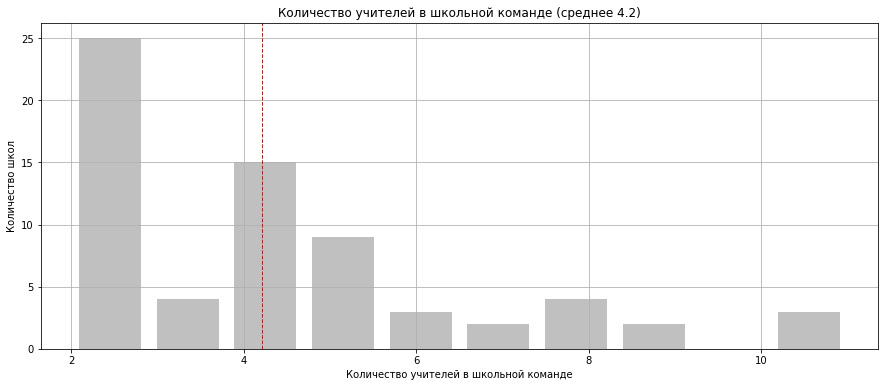

In [47]:
rcParams['figure.figsize'] = 15,6  
df_orgs['teachers'].hist(bins=10, rwidth=0.8, color='silver')
plt.title(f'Количество учителей в школьной команде (среднее {round(df_orgs["teachers"].mean(), 1)})')
plt.ylabel('Количество школ')
plt.xlabel('Количество учителей в школьной команде')
plt.axvline(df_orgs['teachers'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.savefig('images/orgs_distr_3.png')

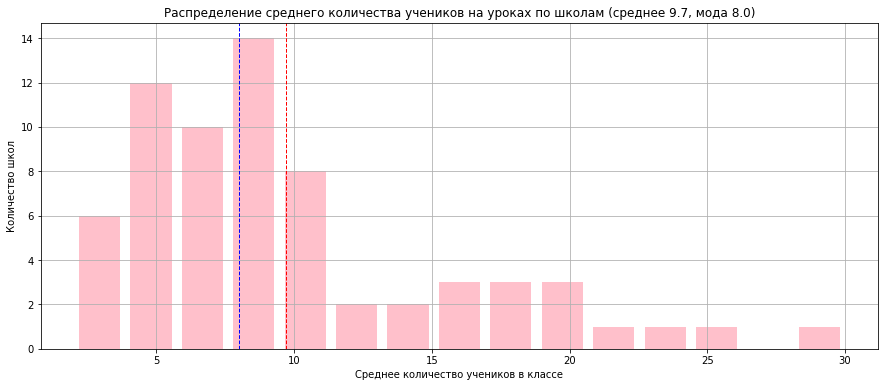

In [48]:
rcParams['figure.figsize'] = 15,6  
df_orgs['pupils_mean'].hist(bins=15, rwidth=0.8, color='pink')
p_mean = round(df_orgs["pupils_mean"].mean(), 1)
p_moda = df_orgs['pupils_mean'].quantile(0.5)
plt.title(f'Распределение среднего количества учеников на уроках по школам (среднее {p_mean}, мода {p_moda})')
plt.ylabel('Количество школ')
plt.xlabel('Среднее количество учеников в классе')
plt.axvline(p_mean, color='r', linestyle='dashed', linewidth=1)
plt.axvline(p_moda, color='b', linestyle='dashed', linewidth=1)
plt.savefig('images/orgs_distr_4.png')

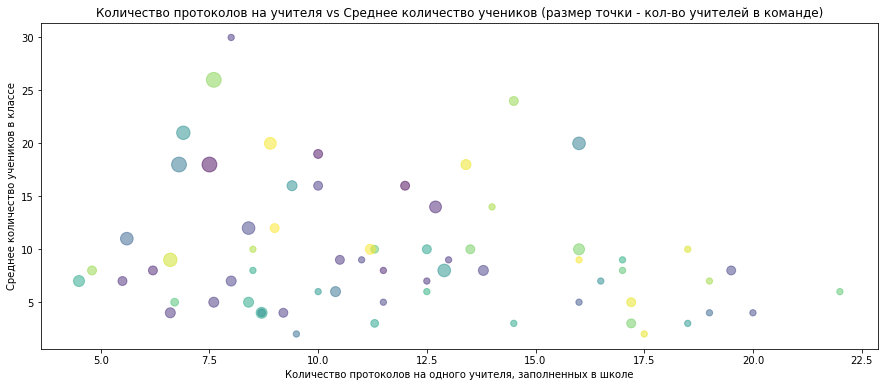

In [52]:
colors = np.random.rand(len(df_orgs))
plt.scatter(df_orgs['protocols_per_teacher'], df_orgs['pupils_mean'], s=df_orgs['teachers']*20, c=colors, alpha=0.5)
plt.title('Количество протоколов на учителя vs Среднее количество учеников (размер точки - кол-во учителей в команде)')
plt.ylabel('Среднее количество учеников в классе')
plt.xlabel('Количество протоколов на одного учителя, заполненных в школе')
plt.savefig('images/orgs_distr_5.png')
plt.show()

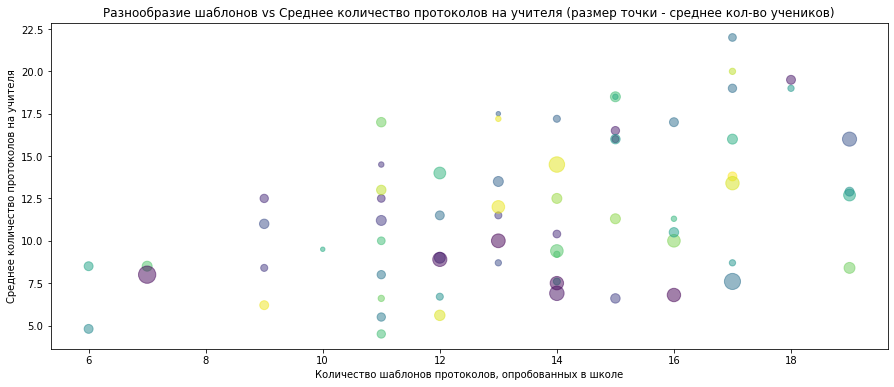

In [50]:
colors = np.random.rand(len(df_orgs))
plt.scatter(df_orgs['prot_templates'], df_orgs['protocols_per_teacher'], s=df_orgs['pupils_mean']*10, c=colors, alpha=0.5)
plt.title('Разнообразие шаблонов vs Среднее количество протоколов на учителя (размер точки - среднее кол-во учеников)')
plt.ylabel('Среднее количество протоколов на учителя')
plt.xlabel('Количество шаблонов протоколов, опробованных в школе')
plt.show()

### Резюме по предварительному анализу данных по организациям

- Количество протоколов, заполненных в каждой из школ проекта, очень разное, максимум и минимум отличаются почти на порядок (16 vs 128)
- Поскольку каждая школьная команда в проекте могла состоять из разного количества учителей, более показательной является статистика по среднему количеству протоколов, заполненных каждым учителем в школе. По этому параметру разброс меньше, но тоже заметный (4.5 vs 22). Поскольку проект длился почти год, в некоторых школах команды учителей могли меняться. Это могло привести к снижению этого показателя, и на самом деле среднюю вовлеченность педагогов в процесс корректнее считать с учетом времени участия конкретного педагога в проекте. Кроме того, некоторые кураторы хотели попробовать себя в роли учителя, и их попытки тоже должны были снизить реальную цифру вовлеченности учителей.
- Видно, что как правило в школьных командах были всего одна или две пары педагогов. Это не означает, что эти школы - маленькие. Возможной причиной небольшого количества учителей в команде может быть осторожность школьной администрации в масштабировании этого проекта в своей школе, связанная или с высокой загруженностью учителей, или с опасениями в эффективности технологии, или с изначально орицательным отношением к кураторской методике.
- Среднее количество учеников в классах, где заполнялись протоколы, также радикально отличается. В рамках этого проекта было заметное количество малокомплектных, небольших сельских школ, где в классах могло быть и два, и три ученика. В половине школ 8 или меньше учеников. В то же время несколько школ имеют полностью укомплектованные классы с количеством учеников, превышающих 20 человек (максимум - 30). Именно этот показатель - среднее количество учеников в классе, может служить показателем, определяющим размер школы. Как правило чем крупнее школа, тем больше в ней и педагогов.
- Первая точечная диаграмма позволяет увидеть, что условный "энтузиазм" школьной команды, пропорциональный степени вовлеченности учителей в процесс, для небольших школ имеет почти равномерное распределение. То есть среди мелких школ есть и те школы, где учителя работали в рамках проекта на регулярной основе, так и школы, которые вложились в проект "по минимуму". В то же время для более крупных школ такой разброс в среднем количестве протоколов на одного педагога уже меньше.
- Вторая точечная диаграмма позволяет увидеть, что, вероятно, разные школы использовали разную тактику. Где-то кураторские тройки (пары педагогов) двигались параллельно и использовали одинаковые шаблоны, а где-то, видимо, каждая тройка могла работать со своими шаблонами. Кроме того, понятно, что кто-то использовал по преимуществу те протоколы, которые по каким-то причинам показались интересными. Возможно, в школах один учитель мог использовать один и тот же шаблон более одного раза. А где-то учителю давали возможность попробовать по возможности максимальное количество разных шаблонов. Это - не хорошо и не плохо. Разнообразие стратегий - это всегда интересно. Можно ли эту разницу в тактике школ как-то оценить, посмотрим дальше. 
- Сезонные изменения метрик по организациям мы сможем проанализировать позднее, это может дать дополнительную информацию для возможных обобщений и оценки общей динамики проекта

___
<a id='people' name='people'></a>
## 7. Кураторы, учителя и наблюдатели

Еще раз фиксируем, что каждый протокол, который был заполнен в рамках этого проекта, объединяет трех людей. Это - учитель, который провел урок, наблюдатель, который фиксировал параметры урока, и куратор этой пары педагогов, с которым проходило обсуждение протокола после проведения урока.
Каждый учитель в проекте почти наверняка успел также побыть в роли наблюдателя. Кроме того, некоторые кураторы могли выступить и в роли учителя, и в роли наблюдателя.

Сейчас мы проведем анализ без учета временнОй динамики процесса, без учета отдельных параметров урока и без вычисления вторичных параметров, которые мы будем проектировать в дальнейшем.

Также в этом анализе мы ограничимся лишь метриками отдельных учителей безотносительно особенностей тех троек и тех организаций, к которым они относятся. Тем не менее анализ "микрогрупп", согласованности их членов - это еще одно потенциально интересное направление анализа, которое заслуживает отдельного исследования.

In [54]:
all_teachers = df_protocols['teacher_id'].unique()
all_observers = df_protocols['observer_id'].unique()
all_curators = df_protocols['curator_id'].unique()
unique_persons = set(all_teachers.tolist() + all_observers.tolist() + all_curators.tolist())

print(f'Количество учителей: {len(all_teachers)}')
print(f'Количество наблюдателей: {len(all_observers)}')
print(f'Количество кураторов: {len(all_curators)}')
print(f'Уникальных персон: {len(unique_persons)}')


Количество учителей: 282
Количество наблюдателей: 283
Количество кураторов: 128
Уникальных персон: 407


In [55]:
# Добавляем к копии датафрейма с протоколами колонки с информацией о группе и уровне шаблона протокола
df2 = df_protocols.copy()
df2 = df2.join(df_templates[['code', 'group', 'level']].set_index('code'), on='template_code')
df2.head(2)

,prot_id,template_code,date_of_lesson,org_id,teacher_id,observer_id,curator_id,class,satisfaction,wish_to_change,...,interactions_strong,interactions_middle,interactions_weak,attention_all,attention_strong,attention_middle,attention_weak,teacher_comments,group,level
0,816,П1.1,01.02.2022,133,726,725,724,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,Больше внимания уделять слабым ученикам и моти...,Распределение внимания учителя,1
1,1162,П1.1,02.02.2022,128,736,735,734,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,Учитель уделяет внимание всем учащимся,Распределение внимания учителя,1


In [56]:
# Создаем датасет df_teachers и добавляем в него ряд колонок, которые и проанализируем

df_teachers = df.groupby('teacher_id').agg({'org_id': 'mean', 'prot_id': 'count', 'pupils_all': 'mean'})
df_teachers.insert(0, 'teacher_id', df_teachers.index)
df_teachers.columns = ['teacher_id', 'org_id', 'protocols', 'pupils_mean']
df_teachers['pupils_mean'] = df_teachers['pupils_mean'].round(0)

def get_count_for_teacher(t_id, df_field, filter_value):
    return len(df2[(df2['teacher_id'] == t_id) & (df2[df_field] == filter_value)])

df_teachers['base_prot'] = df_teachers.apply(lambda x: get_count_for_teacher(x['teacher_id'], 'level', 1), axis=1)
df_teachers['complicated_prot'] = df_teachers.apply(lambda x: get_count_for_teacher(x['teacher_id'], 'level', 2), axis=1)
df_teachers['targeted_prot'] = df_teachers.apply(lambda x: get_count_for_teacher(x['teacher_id'], 'level', 3), axis=1)

def get_unique_field_values_for_teachers(t_id, df_field):
    return len(df2[df2['teacher_id'] == t_id][df_field].unique())

df_teachers['used_templates_groups'] = df_teachers.apply(lambda x: get_unique_field_values_for_teachers(x['teacher_id'], 'group'), axis=1)

def get_mean_field_values_for_teachers(t_id, df_field, r):
    return round(df2[df2['teacher_id'] == t_id][df_field].mean(), r)

df_teachers['class'] = df_teachers.apply(lambda x: get_mean_field_values_for_teachers(x['teacher_id'], 'class', 0), axis=1)
df_teachers['satisfaction'] = df_teachers.apply(lambda x: get_mean_field_values_for_teachers(x['teacher_id'], 'satisfaction', 3), axis=1)

df_teachers

,teacher_id,org_id,protocols,pupils_mean,base_prot,complicated_prot,targeted_prot,used_templates_groups,class,satisfaction
teacher_id,,,,,,,,,,
472,472,71,3,10.0,1,1,1,1,NaN,NaN
473,473,71,14,10.0,4,6,4,5,8.0,3.750
474,474,71,17,11.0,5,7,5,5,6.0,4.000
477,477,72,8,5.0,3,5,0,4,7.0,NaN
478,478,72,12,6.0,4,5,3,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
953,953,106,7,4.0,1,4,2,6,NaN,NaN
954,954,101,7,17.0,3,2,2,3,7.0,3.429
955,955,68,5,21.0,2,1,2,2,NaN,NaN


In [57]:
df_teachers.describe()

,teacher_id,org_id,protocols,pupils_mean,base_prot,complicated_prot,targeted_prot,used_templates_groups,class,satisfaction
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,194.000000,210.000000
mean,721.255319,100.617021,10.641844,11.347518,3.340426,4.216312,3.085106,4.500000,5.500000,3.452686
std,142.136589,26.112311,5.109069,7.006845,2.064200,2.444985,2.246355,1.664471,2.500259,0.442264
min,472.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,601.250000,86.000000,6.000000,6.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.027750
50%,723.000000,106.000000,10.000000,9.000000,3.000000,4.000000,3.000000,5.000000,6.000000,3.500000
75%,844.750000,119.750000,15.000000,17.000000,5.000000,6.000000,5.000000,6.000000,7.000000,3.800000
max,970.000000,133.000000,25.000000,30.000000,10.000000,11.000000,11.000000,7.000000,11.000000,4.000000


Отобранных параметров пока хватит для анализа. В получившемся датафрейме сформированы следующие колонки:
- teacher_id - уникальный id учителя
- org_id - id организации, в которой работает учитель
- protocols - общее количество протоколов наблюдений уроков, проведенных учителем
- base_prot - количество базовых протоколов учителя
- complicated_prot - количество усложненных протоколов учителя
- targeted_prot - количество прицельных протоколов учителя
- pupils_mean - среднее количество учеников на уроках учителя
- used_templates_groups - количество групп шаблонов протоколов, которые использовал учитель (всего - 7 групп)
- class - параллель класса, с которой чаще всего работал учитель
- satisfaction - степень удовлетворения учителя от проведенного урока (диапазон от 1 до 4, где 1 - не удовлетворен, 4 - удовлетворен)

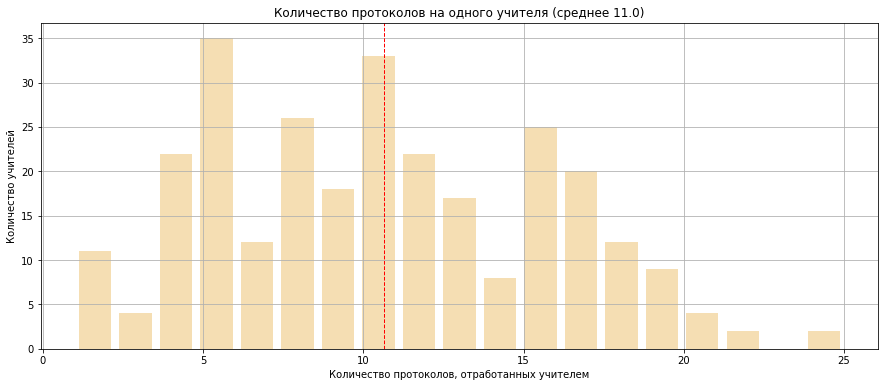

In [58]:
rcParams['figure.figsize'] = 15,6  
df_teachers['protocols'].hist(bins=19, rwidth=0.8, color='wheat')
plt.title(f'Количество протоколов на одного учителя (среднее {round(df_teachers["protocols"].mean(), 0)})')
plt.ylabel('Количество учителей')
plt.xlabel('Количество протоколов, отработанных учителем')
plt.axvline(df_teachers['protocols'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.savefig('images/teachers_distr_1.png')

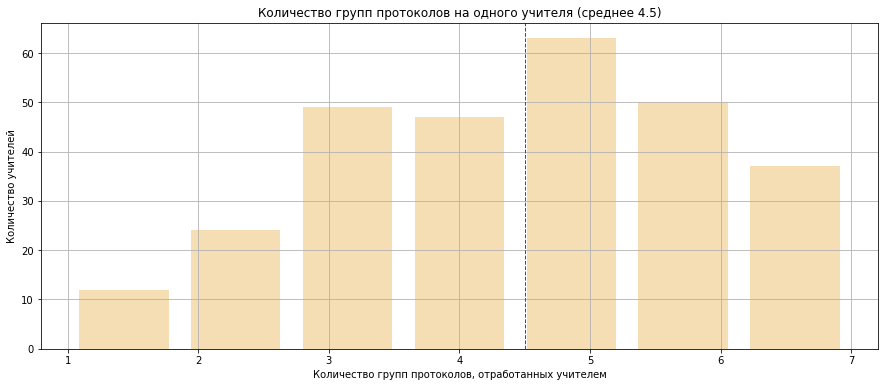

In [59]:
rcParams['figure.figsize'] = 15,6  
df_teachers['used_templates_groups'].hist(bins=7, rwidth=0.8, color='wheat')
plt.title(f'Количество групп протоколов на одного учителя (среднее {round(df_teachers["used_templates_groups"].mean(), 1)})')
plt.ylabel('Количество учителей')
plt.xlabel('Количество групп протоколов, отработанных учителем')
plt.axvline(df_teachers['used_templates_groups'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.savefig('images/teachers_distr_2.png')

Text(0.5, 0, 'Количество групп протоколов, отработанных учителем')

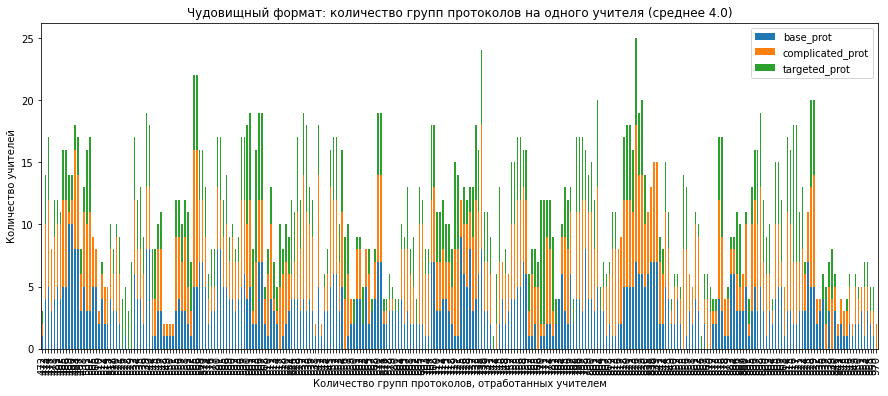

In [42]:
#df2[['abuse','nff']].plot(kind='bar', stacked=True)
rcParams['figure.figsize'] = 15,6  
df_teachers[['base_prot', 'complicated_prot', 'targeted_prot']].plot(kind='bar', stacked=True)
plt.title(f'Чудовищный формат: количество групп протоколов на одного учителя (среднее {round(df_teachers["used_templates_groups"].mean(), 0)})')
plt.ylabel('Количество учителей')
plt.xlabel('Количество групп протоколов, отработанных учителем')

Text(0, 0.5, 'Количество протоколов на одного учителя')

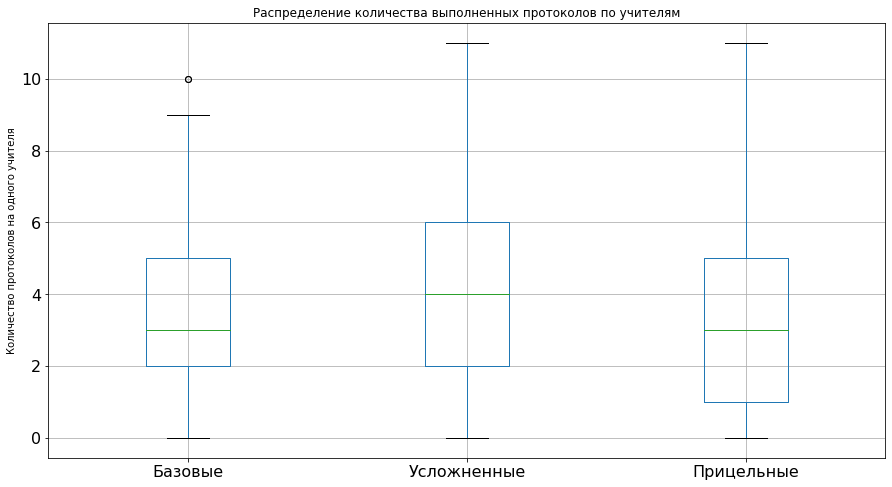

In [43]:
t_tmp = df_teachers[['base_prot', 'complicated_prot', 'targeted_prot']]
t_tmp.columns = ['Базовые', 'Усложненные', 'Прицельные']
t_tmp.boxplot(fontsize=16, figsize=(15,8))
plt.title('Распределение количества выполненных протоколов по учителям')
plt.ylabel('Количество протоколов на одного учителя')

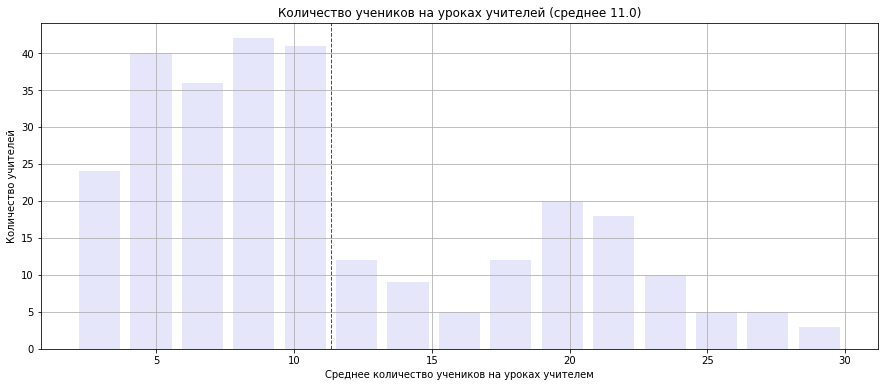

In [44]:
rcParams['figure.figsize'] = 15,6  
df_teachers['pupils_mean'].hist(bins=15, rwidth=0.8, color='lavender')
plt.title(f'Количество учеников на уроках учителей (среднее {round(df_teachers["pupils_mean"].mean(), 0)})')
plt.ylabel('Количество учителей')
plt.xlabel('Среднее количество учеников на уроках учителем')
plt.axvline(df_teachers['pupils_mean'].mean(), color='r', linestyle='dashed', linewidth=1)

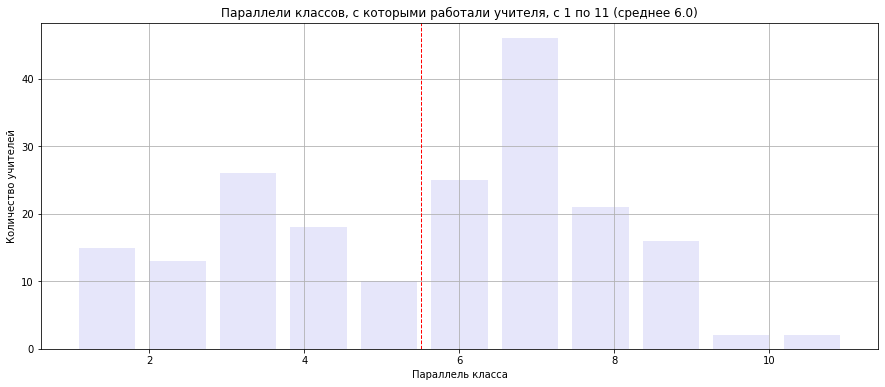

In [60]:
rcParams['figure.figsize'] = 15,6  
df_teachers['class'].hist(bins=11, rwidth=0.8, color='lavender')
plt.title(f'Параллели классов, с которыми работали учителя, с 1 по 11 (среднее {round(df_teachers["class"].mean(), 0)})')
plt.ylabel('Количество учителей')
plt.xlabel('Параллель класса')
plt.axvline(df_teachers['class'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.savefig('images/teachers_distr_3.png')

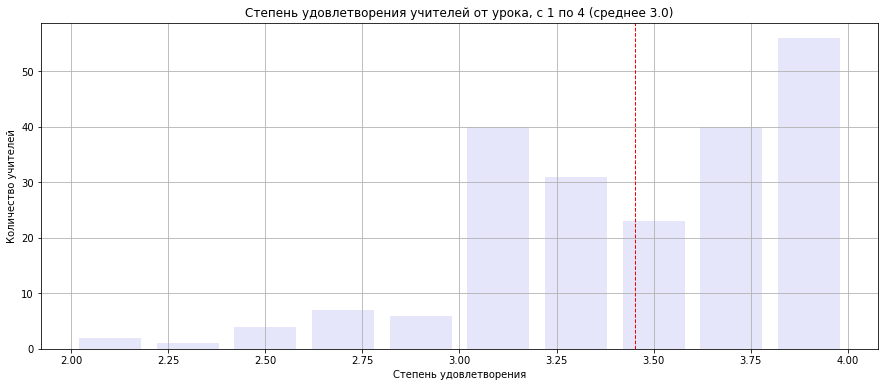

In [63]:
rcParams['figure.figsize'] = 15,6  
df_teachers['satisfaction'].hist(bins=10, rwidth=0.8, color='lavender')
plt.title(f'Степень удовлетворения учителей от урока, с 1 по 4 (среднее {round(df_teachers["satisfaction"].mean(), 0)})')
plt.ylabel('Количество учителей')
plt.xlabel('Степень удовлетворения')
plt.axvline(df_teachers['satisfaction'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.savefig('images/teachers_distr_5.png')

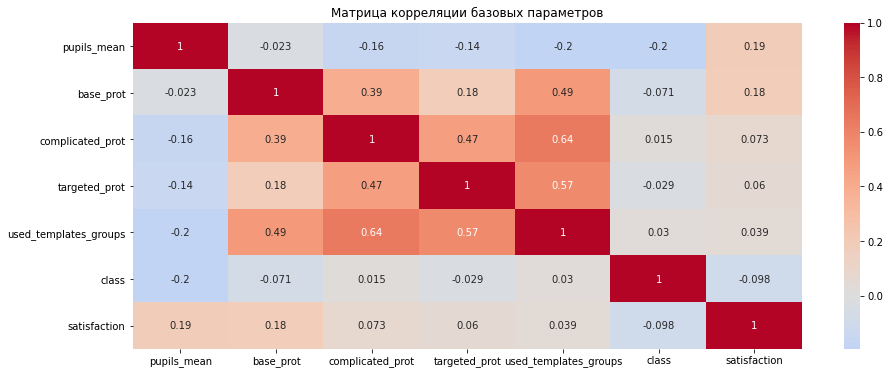

In [62]:
t_tmp = df_teachers.copy().drop(["teacher_id", 'org_id', 'protocols'], axis=1)
plt.title('Матрица корреляции базовых параметров')
sns.heatmap(t_tmp.corr(), annot = True, center= 0, cmap= 'coolwarm')
plt.savefig('images/teachers_distr_4.png')

### Резюме по предварительному анализу данных по учителям

- Многие особенности распределения данных, которые были выявлены на уровне анализа организаций, проявились и при анализе учителей, неожиданностей я не увидел.
- В среднем учителя за время работы с проектом запротоколировали по 11 уроков. Распределение количества протоколов на одного учителя похоже на нормальное, но есть еще один "всплеск" на уровне 5 протоколов. Он может быть вызван разными причинами, в том числе - требованием по минимальному количеству протоколов на одного учителя или элементарной перегруженностью учителей.
- Кажется хорошим распределение количества групп протоколов, которые попробовал каждый из учителей. Из 7 имеющихся групп протоколов среднее значение этого параметра - 4.5, т.е. учителя на практике попробовали закрепить бОльшую часть тех педагогических приемов, на которых заостряется внимание в каждой из групп протоколов.
- Интересно распределение среднего количества учеников на уроках. Видны два максимума. Можно предположить, что при дальнейших анализах будет интересно сравнивать результаты организаций с малокомплектыми классами и с классами, более похожими на городские.
- Корреляционная матрица с текущим набором параметров также никаких неожиданностей не принесла. Видно, что высока корреляция между параметрами, касающимися частоты использования протоколов или их групп. 
- Очевидно, что нужно искать дополнительные параметры для анализа, чем мы и займемся в дальнейшем